# San Francisco Rental Prices Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions that can be used for a Panel dashboard.

In [112]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
from panel.interact import interact
import matplotlib.pyplot as plot
import os
from pathlib import Path
from dotenv import load_dotenv

In [113]:
# Read the Mapbox API key
load_dotenv()
mapbox_token = os.getenv("MAPBOX_API_KEY")
print(mapbox_token)

pk.eyJ1IjoiZnJlZGRpZWVpc2EiLCJhIjoiY2ttMnJicjUzMjJoazJ1a3ZkbzIzdGx6YSJ9.gDY7D7dYEF7sQNZIljwZsQ


# Import Data

In [114]:
# Import the CSVs to Pandas DataFrames
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")

file_path = Path("Data/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)

- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

In [119]:
def housing_units_per_year():
    """Housing Units Per Year."""

    average_housing = sfo_data["housing_units"].groupby(["year"]).mean()
    average_housing_plot = plot.figure(figsize=(7, 5))
    axis = average_housing.plot.bar(x="year", ylim=[(average_housing.min() - average_housing.std()), (average_housing.max() + average_housing.std())], title="Average Number of Housing Units Sold per Year", rot=360)
    axis.set_ylabel("Average Number of Housing Units Sold")
    axis.set_xlabel("Year")
    plot.close(average_housing_plot)
    return pn.pane.Matplotlib(average_housing_plot)

# Set Average Gross Rent Function
def average_gross_rent():  
    """Average Gross Rent in San Francisco Per Year."""
    
    average_gross_rent = sfo_data["gross_rent"].groupby(["year"]).mean()
    gross_rent_plot = plot.figure(figsize=(7, 5))
    axis = average_gross_rent.plot.line(x='year', y='gross_rent', title="Average Gross Rent per Year")
    axis.set_ylabel("Average Gross Rent")
    axis.set_xlabel("Year")
    plot.close(gross_rent_plot)
    return pn.pane.Matplotlib(gross_rent_plot)


# Set Average Sales Price Function
def average_sales_price():
    """Average Sales Price Per Year."""
    
    average_price = sfo_data["sale_price_sqr_foot"].groupby([sfo_data.index]).mean()
    sales_price_plot = plot.figure(figsize=(7, 5))
    axis = (average_price.plot.line(x='year', y='sale_price_sqr_foot', title="Average Sales Price per Year"))
    axis.set_ylabel("Average Sales Price")
    axis.set_xlabel("Year")
    plot.close(sales_price_plot)
    return pn.pane.Matplotlib(sales_price_plot)


# Set Average Price by Neighborhood Function
def average_price_by_neighborhood():
    """Average Prices by Neighborhood."""
    
    new_sfo_data = sfo_data.groupby([sfo_data.index, "neighborhood"]).mean()
    new_sfo_data = pd.DataFrame(new_sfo_data).reset_index()
    def choose_neighborhood(Neighborhood):
        return new_sfo_data.loc[new_sfo_data['neighborhood']== Neighborhood, :].hvplot.line(
            x="year",
            y="sale_price_sqr_foot",
            colormap="viridis",
            title="San Francisco Average Sale Price per Square Foot by Year",
            xlabel="Year", 
            ylabel="Average Sale Price per Square Foot"
        )

    neighborhood_choice = new_sfo_data["neighborhood"]
    return interact(choose_neighborhood, Neighborhood=neighborhood_choice)

top_ten = sfo_data.groupby(by="neighborhood").mean()
top_ten = top_ten.sort_values(by="sale_price_sqr_foot", ascending=False).head(10)
top_ten = top_ten.reset_index()


# Create Top Most Expensive Neighborhoods Function
def top_most_expensive_neighborhoods():
    """Top 10 Most Expensive Neighborhoods."""
    
    top_ten_plot = top_ten.hvplot.bar(
        "neighborhood",
        "sale_price_sqr_foot",
        title="Top 10 Most Expensive Neighbprhoods in San Francisco",
        xlabel="Neighborhood",
        ylabel="Avg. Sale Price per Square Foot",
        rot=90,
        ylim=(0, 1000)
    )
    return top_ten_plot


# Create Parallel Coordinates Plot
def parallel_coordinates():
    """Parallel Coordinates Plot."""
    
    parallel_coordinates_plot = px.parallel_coordinates(
        top_ten,
        color="sale_price_sqr_foot",
        color_continuous_scale=px.colors.sequential.Inferno,
        title='Average Values per Neighborhood',
        labels={'neighborhood': "Neighborhood", 
                'sale_price_sqr_foot':'Sale Price per Square Foot',
               'housing_units':'Housing Units',
               'gross_rent':'Gross Rent'},
    )
    return parallel_coordinates_plot


# Create Parallel Categories Function
def parallel_categories():
    """Parallel Categories Plot."""
    
    parallel_categories_plot = px.parallel_categories(
        top_ten,
        color="sale_price_sqr_foot",
        color_continuous_scale=px.colors.sequential.Inferno,
        title='Average Values per Neighborhood',
        labels={'neighborhood': "Neighborhood", 
                'sale_price_sqr_foot':'Sale Price per Square Foot',
               'housing_units':'Housing Units',
               'gross_rent':'Gross Rent'},
    )
    return parallel_categories_plot


# Create Neighborhood Map Function
def neighborhood_map():
    """Neighborhood Map"""
    
    neighborhoods = sfo_data.groupby(by="neighborhood").mean()
    neighborhoods = neighborhoods.sort_values(by="sale_price_sqr_foot", ascending=False)
    neighborhoods = neighborhoods.reset_index()
    joined_neighborhoods=pd.concat([df_neighborhood_locations,
                                    neighborhoods['sale_price_sqr_foot'],
                                    neighborhoods['housing_units'],
                                    neighborhoods['gross_rent']
                                   ], axis=1).dropna()
    
    px.set_mapbox_access_token(mapbox_token)
    map = px.scatter_mapbox(
        joined_neighborhoods,
        lat="Lat",
        lon="Lon",
        size="sale_price_sqr_foot",
        color="gross_rent",
        color_continuous_scale=px.colors.cyclical.IceFire,
        size_max=15,
        zoom=10.5,
        hover_name="Neighborhood",
        title="Sale price per foot and gross rent in San Francisco",
    )
    return map

Matplotlib(Figure)
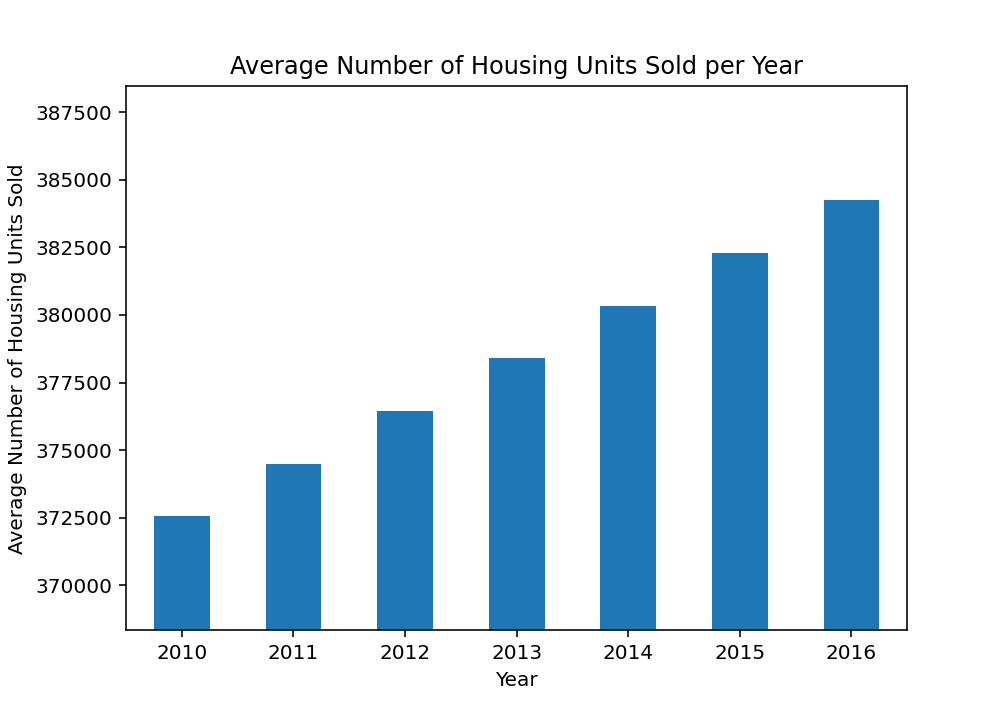

In [116]:
housing_units_per_year()

Matplotlib(Figure)
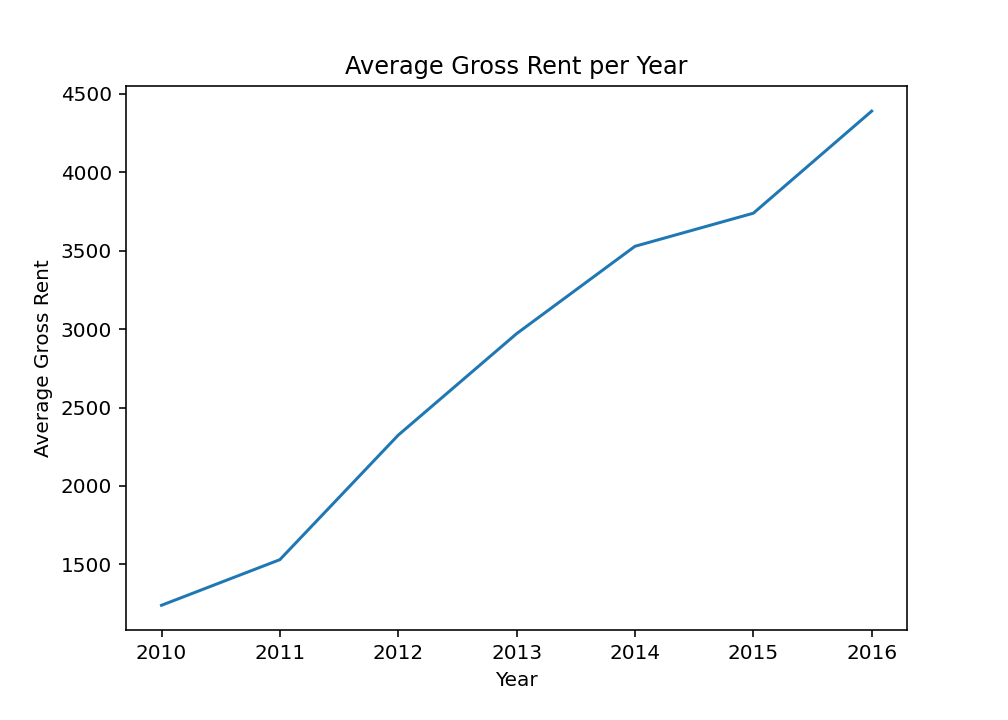

In [117]:
average_gross_rent()

Matplotlib(Figure)
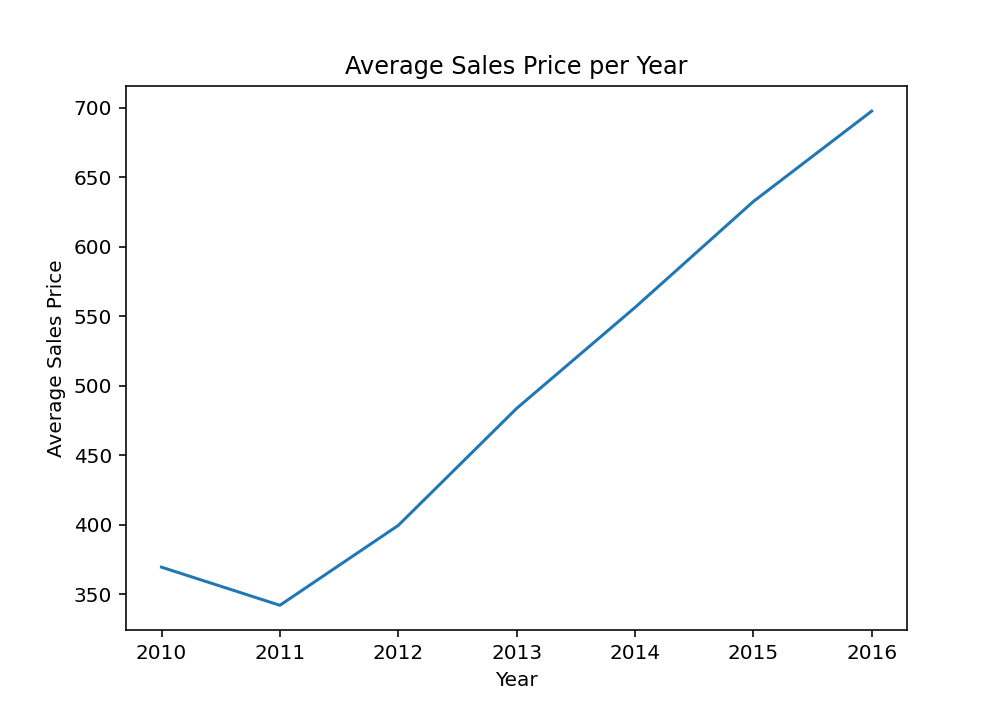

In [118]:
average_sales_price()

In [109]:
average_price_by_neighborhood()

Column
    [0] Column
        [0] Select(name='Neighborhood', options=['Alamo Square', ...], value='Alamo Square')
    [1] Row
        [0] HoloViews(Curve, name='interactive06208')

## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

In [110]:
welcome_column = pn.Column("""Homework Dashboard""", neighborhood_map())

yma_column = pn.Row( housing_units_per_year, average_gross_rent(), average_sales_price())

na_column = pn.Column(top_most_expensive_neighborhoods(), average_price_by_neighborhood())

para_column = pn.Column(parallel_coordinates(), parallel_categories())

dashboard = pn.Tabs(
    ("Welcome", welcome_column),
    ("Yearly Market Analysis", yma_column),
    ("Neighborhood Analysis", na_column),
    ("Parallel Plots Analysis", para_column)    
)

## Serve the Panel Dashboard

Tabs
    [0] Column
        [0] Markdown(str)
        [1] Plotly(Figure)
    [1] Row
        [0] Column
            [0] Column()
            [1] Row
                [0] Matplotlib(Figure)
        [1] Matplotlib(Figure)
        [2] Matplotlib(Figure)
    [2] Column
        [0] HoloViews(Bars)
        [1] Column
            [0] Column
                [0] Select(name='Neighborhood', options=['Alamo Square', ...], value='Alamo Square')
            [1] Row
                [0] HoloViews(Curve, name='interactive06487')
    [3] Column
        [0] Plotly(Figure)
        [1] Plotly(Figure)
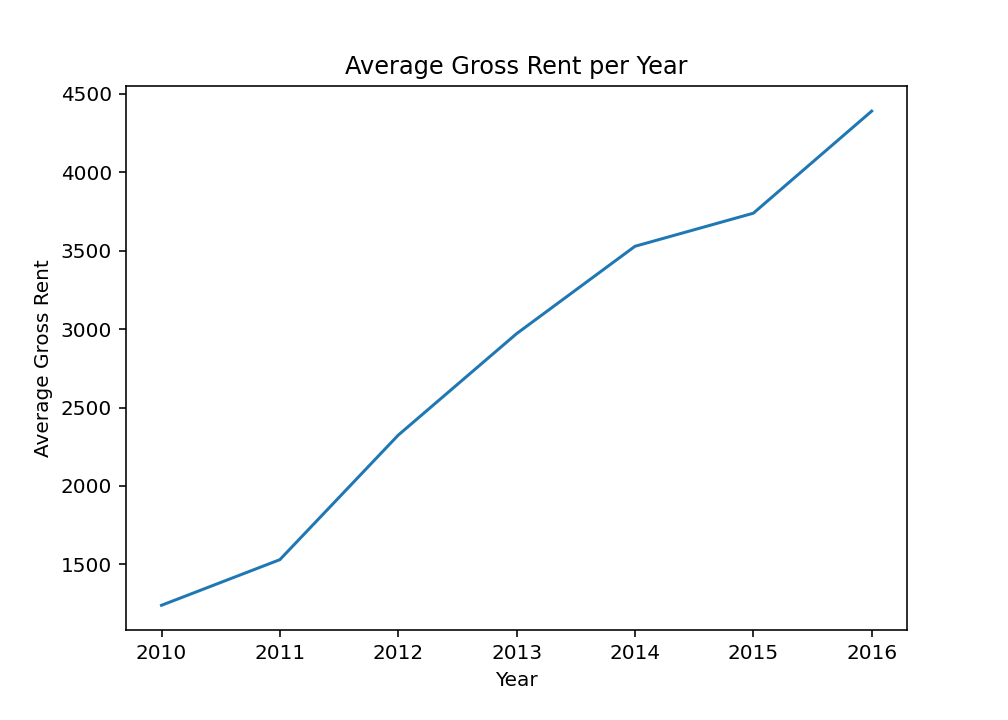
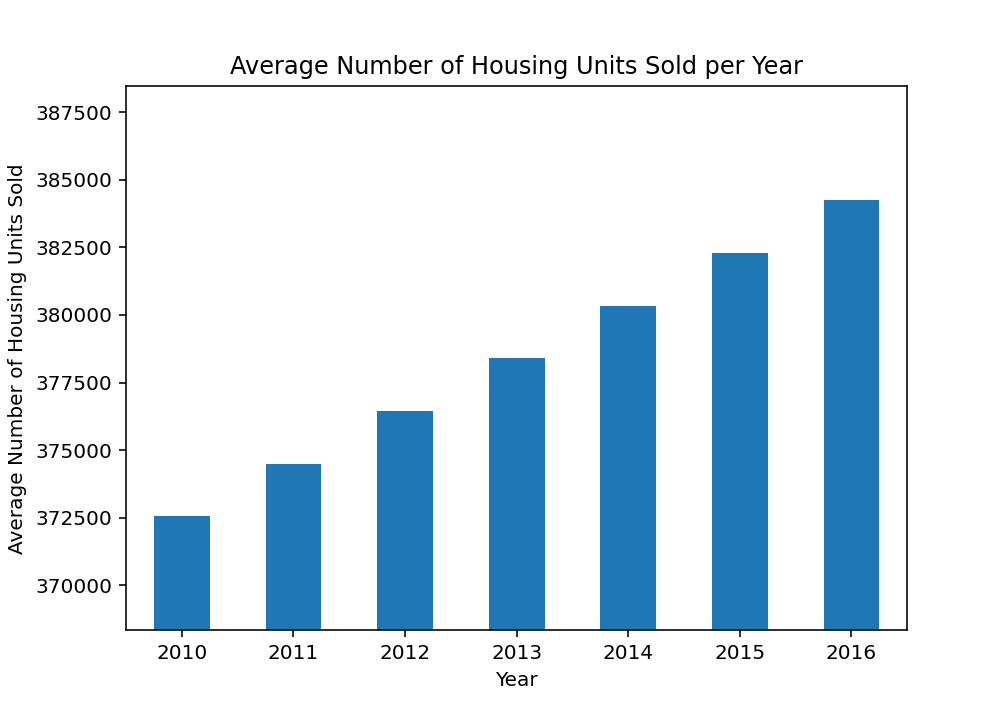
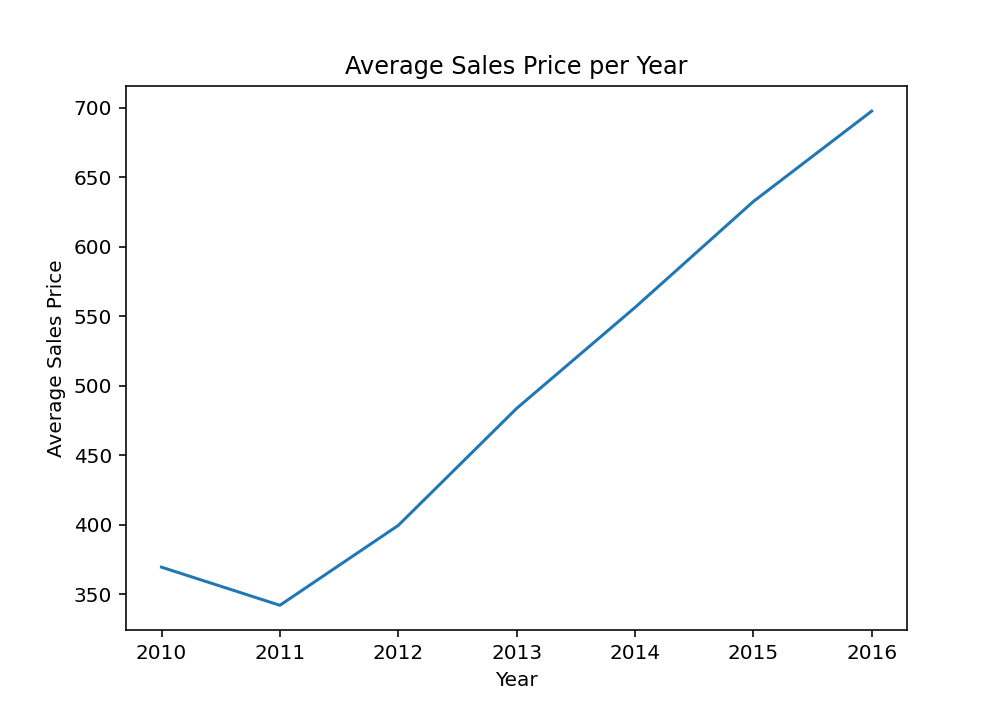

In [111]:
dashboard.servable()
